In [11]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/F-said/mini_cap/main/data/raw/finance/Application_for_State_Aid.csv")

df.head()

,PROJECT NUMBER,BUILDING ID,PROJECT DESCRIPTION,SCHOOL NAME,SCHOOL ADDRESS,SED APPROVED ESTIMATE,DATE APPLICATION SUBMITTED TO SED,BOROUGH,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT (2020),BIN,BBL,NTA (2020)
0,1EJQ,K435,AUDITORIUM UPGRADE - REPLACE AND UPGRADE AUDIT...,PERFORMING ARTS AND TECH. HS -,400 PENNSYLVANIA AVENUE,65843,03/07/2023,BROOKLYN,11207.0,40.667456,-73.894747,305.0,42.0,1156.0,3084440.0,3.037880e+09,BK0502
1,1EJR,Q268,ARCHITECTURAL AND BARRIER REMOVAL,P.S. 268 - QUEENS,92-07 175 STREET,150104,03/07/2023,QUEENS,11433.0,40.707537,-73.785626,412.0,27.0,444.0,4217573.0,4.102150e+09,QN1201
2,1EJT,K171,GYMNASIUM UPGRADE,I.S. 171 - BROOKLYN,528 RIDGEWOOD AVENUE,157701,03/07/2023,BROOKLYN,11208.0,40.686180,-73.869625,305.0,37.0,1184.0,3092456.0,3.041340e+09,BK0501
3,1EJU,Q015,LIBRARY RECONSTRUCTION AND UPGRADE,P.S. 15 - QUEENS,121-15 LUCAS STREET,184079,03/07/2023,QUEENS,11413.0,40.686047,-73.757423,412.0,27.0,376.0,4273142.0,4.126720e+09,QN1205
4,1EJV,M477,SCIENCE LAB UPGRADE,STUYVESANT HS - MANHATTAN,345 CHAMBERS STREET,79153,03/07/2023,MANHATTAN,10282.0,40.717700,-74.013990,101.0,1.0,31703.0,1084587.0,1.000160e+09,MN0101


In [36]:
## Machine Algo 2

df["PROJECT DESCRIPTION"].value_counts()


computer room upgrade                                                                                   418
toilet reconstruction                                                                                   198
asbestos abatement                                                                                      161
SCIENCE LAB UPGRADE                                                                                      61
BUILDING SYSTEM IMPROVEMENT - HEATING PLANT UPGRADE                                                      54
auditorium  upgrade                                                                                      37
INDOOR BUILDING IMPROVEMENT - CONVERSION OF ADMINISTRATIVE SPACE INTO CLASSROOMS                         26
SECURITY CAMERA SYSTEM UPGRADE                                                                           20
INDOOR BUILDING IMPROVEMENT - RECONSTRUCTION OF PIPING AND PLUMBING SYSTEM.                              20
GYMNASIUM UPGRADE           

In [13]:
import numpy as np

cond = df["PROJECT DESCRIPTION"] == "INDOOR BUILDING IMPROVEMENT - COMPUTER ROOM WIRING TO UPGRADE COMPUTER LABS"

df["PROJECT DESCRIPTION"] = np.where(cond, "computer room upgrade", df["PROJECT DESCRIPTION"])

In [30]:
cond = df["PROJECT DESCRIPTION"] == "AUDITORIUM UPGRADE - REPLACE AND UPGRADE AUDITORIUM SOUND SYSTEM AND LIGHTING."

df["PROJECT DESCRIPTION"] = np.where(cond, "auditorium  upgrade", df["PROJECT DESCRIPTION"])

In [31]:
cond_toilet = df["PROJECT DESCRIPTION"] == "INDOOR BUILDING IMPROVEMENT - RECONSTRUCTION OF TOILETS"

df["PROJECT DESCRIPTION"] = np.where(cond_toilet, "toilet reconstruction", df["PROJECT DESCRIPTION"])

In [15]:
cond_toilet = df["PROJECT DESCRIPTION"] == "Asbestos  abatement"

df["PROJECT DESCRIPTION"] = np.where(cond_toilet, "asbestos abatement", df["PROJECT DESCRIPTION"])

df["PROJECT DESCRIPTION"].value_counts()

computer room upgrade                                                                                   418
toilet reconstruction                                                                                   198
asbestos abatement                                                                                      161
SCIENCE LAB UPGRADE                                                                                      61
BUILDING SYSTEM IMPROVEMENT - HEATING PLANT UPGRADE                                                      54
AUDITORIUM UPGRADE - REPLACE AND UPGRADE AUDITORIUM SOUND SYSTEM AND LIGHTING.                           37
INDOOR BUILDING IMPROVEMENT - CONVERSION OF ADMINISTRATIVE SPACE INTO CLASSROOMS                         26
SECURITY CAMERA SYSTEM UPGRADE                                                                           20
INDOOR BUILDING IMPROVEMENT - RECONSTRUCTION OF PIPING AND PLUMBING SYSTEM.                              20
GYMNASIUM UPGRADE           

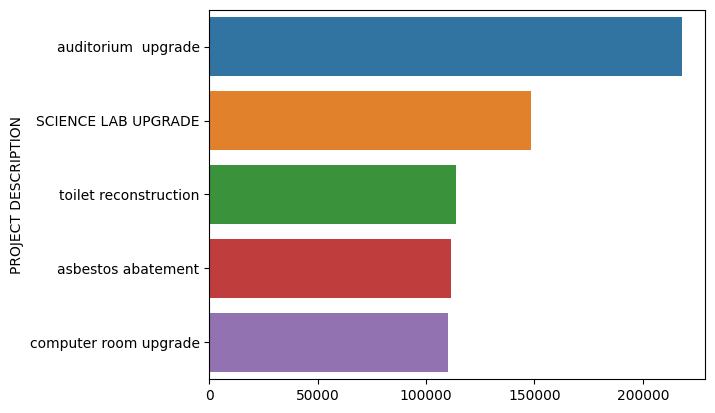

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


select_cols = ["computer room upgrade", "asbestos abatement", "SCIENCE LAB UPGRADE","toilet reconstruction","auditorium  upgrade"]

df_select = df[df["PROJECT DESCRIPTION"].isin(select_cols)]

borough = df[["BOROUGH", "SCHOOL NAME", "PROJECT DESCRIPTION", "SED APPROVED ESTIMATE"]]
### most requested services among all 5Bouroughs

proj_mean = df_select.groupby(by="PROJECT DESCRIPTION")["SED APPROVED ESTIMATE"].mean().sort_values(ascending=False)

sns.barplot(x = proj_mean.values, y = proj_mean.index)
plt.show()
#print(proj_mean)

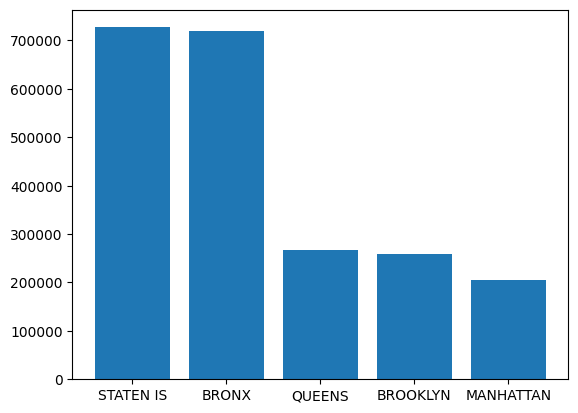

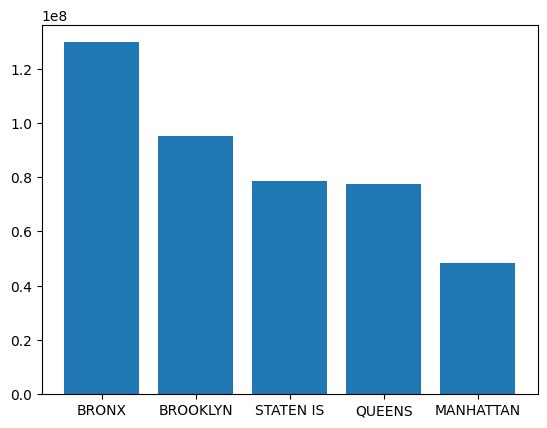

In [26]:


###  borough provided with most funding (Amount Total " sed Estimate")
total_count = borough.groupby(by="BOROUGH")["SED APPROVED ESTIMATE"].mean().sort_values(ascending=False)

plt.bar(total_count.index, total_count.values)
plt.show()

 ###  borough with the most requests for funding
 
total_count = borough.groupby(by="BOROUGH")["SED APPROVED ESTIMATE"].sum().sort_values(ascending=False)

plt.bar(total_count.index, total_count.values)
plt.show()


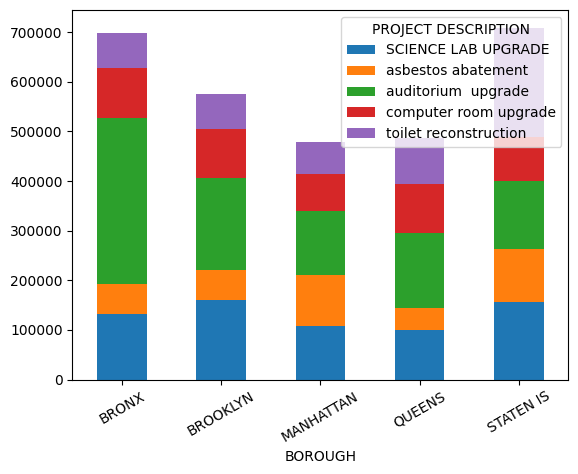

In [33]:
proj_boro = df_select.groupby(by=["BOROUGH", "PROJECT DESCRIPTION"])["SED APPROVED ESTIMATE"]

proj_boro.median("SED APPROVED ESTIMATE")


proj_boro.median("SED APPROVED ESTIMATE").unstack().plot(kind='bar', stacked=True, )
plt.xticks(rotation=30)
plt.show()